In [34]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime


%matplotlib inline  

In [35]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [36]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'

In [37]:

''' Колонки '''
ticker = 'ADBE'



''' время '''
stime='1999-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [38]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.head(3)

,ADBE
Date,
1999-01-01 00:00:00-05:00,5.912915
1999-02-01 00:00:00-05:00,4.984185
1999-03-01 00:00:00-05:00,7.027391


change index

In [39]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,ADBE
Date_index,
1999-01-01,5.912915
1999-02-01,4.984185
1999-03-01,7.027391


In [40]:
# df.loc['1999-01-01']

In [41]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [42]:
# df_st_gr

In [43]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,37.459574,10.119149,16.676596,15.73617,12.970213,29.895745,-0.393617,29.895745,10.095745,158169100000,158566100000,33.256749,8.983818,20.179778,21.385763,11.256786,11.256786,9.006367,22.730232,20.230429,21.43944,0.030069,0.04676,0.287951,0.482754,0.056909,1.106791,54.446429,1.648024,None,0.0,0.069238,0.169658,0.524057,-0.056392,-0.025105,-0.516355,0.08179,82.502658,0.320324,0.367855,-11.636702,868000000,-185000000,-4118000000,0.329727,1971500000,345500000,None,42.81069,63.896074,0.0,8.525908,5.712401,None,0.338481,-0.940426
2021,FY,33.092243,10.109015,15.157233,14.427673,12.155136,31.020964,0.647799,31.020964,10.033543,270487619999.999969,271316619999.999969,56.094488,17.135738,37.411842,39.303636,18.279896,18.279896,17.188256,41.071241,37.526503,39.424095,0.017827,0.025443,0.309252,0.456811,0.125492,1.250577,51.345133,1.499378,None,0.0,0.068736,0.160912,0.531845,-0.048133,-0.022046,-0.441624,0.067723,83.998846,0.285686,0.378107,-10.980084,1737000000,309000000,-3775000000,0.315807,1878000000,312000000,None,43.425404,61.061662,0.0,8.405218,5.977564,None,0.325877,-0.72956
2020,FY,26.752599,10.935551,11.906445,11.035343,12.45738,27.575884,2.417879,27.575884,10.029106,240432652785,240662652785,45.70963,18.684539,41.982304,45.29628,18.126708,18.126708,18.702413,47.66541,42.022464,45.339611,0.021877,0.022077,0.34801,0.453797,0.045554,1.477866,36.525862,1.088783,None,0.0,0.075225,0.170034,0.498312,-0.073162,-0.032561,-0.553501,0.07064,82.371374,0.225709,0.431749,-8.273389,2634000000,1163000000,-2874000000,0.354946,1638000000,309000000,None,39.654181,64.860627,0.0,9.204578,5.627451,None,0.396562,-0.871102


In [44]:
df_key_metr.index[0]

'2022'

In [45]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000']

In [46]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [47]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [48]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [49]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [50]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[344.3800048828125,
 534.2999877929688,
 458.7699890136719,
 351.1400146484375,
 247.82000732421875,
 199.75999450683594,
 113.37999725341797,
 89.12999725341797,
 70.12999725341797,
 59.189998626708984,
 37.83000183105469,
 30.950000762939453,
 33.04999923706055,
 32.29999923706055,
 19.309999465942383,
 34.93000030517578,
 38.869998931884766,
 39.72999954223633,
 28.444419860839844,
 19.11904525756836,
 13.16775894165039,
 16.771486282348633,
 21.70256233215332]

In [51]:
df_key_metr[ticker] = list(stock_year_prices)

In [52]:
df_key_metr.drop('period', axis=1, inplace=True)

In [53]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,ADBE
2002,2.459081,0.404078,0.695278,0.628611,1.304156,1.423615,1.212978,1.423615,0.0,5944391299.599999,5760707299.599999,31.057588,5.10341,18.049899,19.964169,8.815373,8.815373,4.945713,16.545674,17.49215,19.347269,0.032198,0.05009,0.0,0.358773,-0.52757,2.157953,None,1.720652,0.001999,0.062075,0.0,0.211268,0.094875,-0.095885,-0.027111,-0.49744,0.0,3.597662,0.425653,0.201084,0.740187,436883000,574549000,436883000,0.0,1012436500,174882500,None,46.02438,132.174603,0.0,7.930579,2.761499,None,0.28384,-0.066667,13.167759
2001,2.578451,0.43119,0.877926,0.780308,1.219514,1.293654,1.293654,1.293654,0.0,7651450414.799999,7432788414.799999,37.207263,6.222108,18.274215,20.560346,12.401617,12.401617,6.044293,20.443562,17.751977,19.972775,0.026876,0.048637,0.0,0.337033,-0.60142,2.446554,None,2.036053,0.001569,0.058387,0.0,0.182254,0.0,-0.111191,-0.037859,-0.821891,0.0,3.542702,0.61341,0.220975,0.785801,453713000,None,453713000,0.0,1010202500,171445500,None,42.268016,138.429424,0.0,8.635371,2.636723,None,0.333312,-0.097618,16.771486
2000,2.657198,0.603898,0.932944,0.87034,1.426821,1.579994,1.577896,1.579994,0.0,13775994128.799999,13538994128.799999,47.865223,10.878264,30.98333,33.211973,18.294813,18.294813,10.691116,27.80001,30.450298,32.640599,0.020892,0.03011,0.0,0.296539,-0.486639,2.787302,None,1.54487,0.00087,0.041621,0.0,0.189684,0.0,-0.067104,-0.02356,-0.689451,0.0,4.63341,0.541224,0.269231,1.013462,563000000,None,561000000,0.0,1019000000,176000000,None,46.115773,167.325655,0.0,7.914862,2.181375,None,0.382215,-0.062604,21.702562


In [54]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [56]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,ADBE,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % ADBE
2022,37.459574,10.119149,16.676596,15.73617,12.970213,29.895745,-0.393617,29.895745,10.095745,158169100000,158566100000,33.256749,8.983818,20.179778,21.385763,11.256786,11.256786,9.006367,22.730232,20.230429,21.43944,0.030069,0.04676,0.287951,0.482754,0.056909,1.106791,54.446429,1.648024,None,0.0,0.069238,0.169658,0.524057,-0.056392,-0.025105,-0.516355,0.08179,82.502658,0.320324,0.367855,-11.636702,868000000,-185000000,-4118000000,0.329727,1971500000,345500000,None,42.81069,63.896074,0.0,8.525908,5.712401,None,0.338481,-0.940426,344.380005,13.197447,0.100250,10.024013,9.069358,6.705614,-3.627288,-160.762239,-3.627288,0.619938,-41.524459,-41.556805,-40.712981,-47.572622,-46.060454,-45.588335,-38.419857,-38.419857,-47.601623,-44.656574,-46.090291,-45.618434,68.670988,83.784120,-6.887861,5.678956,-54.650963,-11.497548,6.040097,9.913825,0.000000,0.000000,0.729773,5.435144,-1.464465,17.159110,13.874613,16.921796,20.772672,-1.781201,12.124295,-2.711375,5.980084,-50.028785,-159.870550,9.086093,4.407803,4.978701,10.737179,0,-1.415564,4.641884,0,1.435890,-4.435972,0,3.867835,28.903155,-35.545571
2021,33.092243,10.109015,15.157233,14.427673,12.155136,31.020964,0.647799,31.020964,10.033543,270487619999.999969,271316619999.999969,56.094488,17.135738,37.411842,39.303636,18.279896,18.279896,17.188256,41.071241,37.526503,39.424095,0.017827,0.025443,0.309252,0.456811,0.125492,1.250577,51.345133,1.499378,None,0.0,0.068736,0.160912,0.531845,-0.048133,-0.02204

In [23]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

Vizualization

In [24]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])

In [33]:
df_with_changes

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,ADBE,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % ADBE
2000,2.657198,0.603898,0.932944,0.87034,1.426821,1.579994,1.577896,1.579994,0.0,13775994128.799999,13538994128.799999,47.865223,10.878264,30.98333,33.211973,18.294813,18.294813,10.691116,27.80001,30.450298,32.640599,0.020892,0.03011,0.0,0.296539,-0.486639,2.787302,None,1.54487,0.00087,0.041621,0.0,0.189684,0.0,-0.067104,-0.02356,-0.689451,0.0,4.63341,0.541224,0.269231,1.013462,563000000,None,561000000,0.0,1019000000,176000000,None,46.115773,167.325655,0.0,7.914862,2.181375,None,0.382215,-0.062604,21.702562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,0.000000
2001,2.578451,0.43119,0.877926,0.780308,1.219514,1.293654,1.293654,1.293654,0.0,7651450414.799999,7432788414.799999,37.207263,6.222108,18.274215,20.560346,12.401617,12.401617,6.044293,20.443562,17.751977,19.972775,0.026876,0.048637,0.0,0.337033,-0.60142,2.446554,None,2.036053,0.001569,0.058387,0.0,0.182254,0.0,-0.111191,-0.037859,-0.821891,0.0,3.542702,0.61341,0.220975,0.785801,453713000,None,453713000,0.0,1010202500,171445500,None,42.268016,138.42

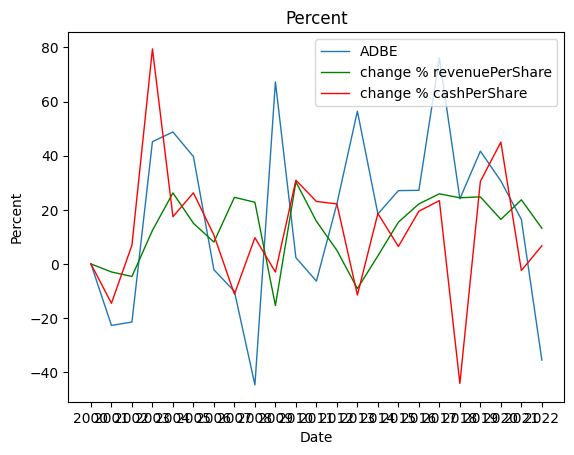

In [25]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [26]:
	# change % netDebtToEBITDA	change % currentRatio

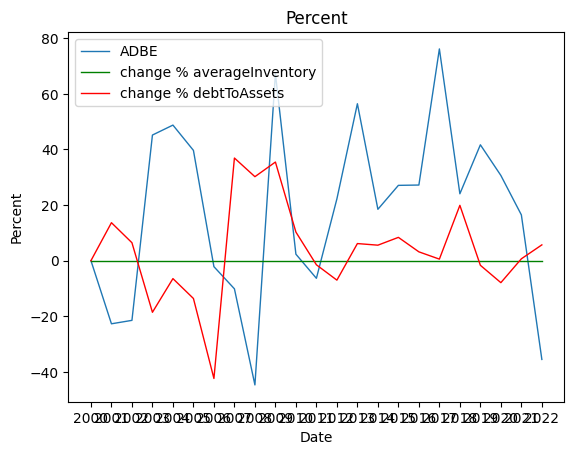

In [27]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

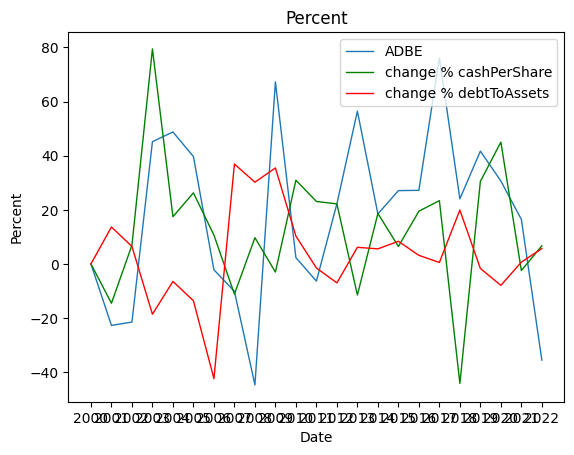

In [28]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()